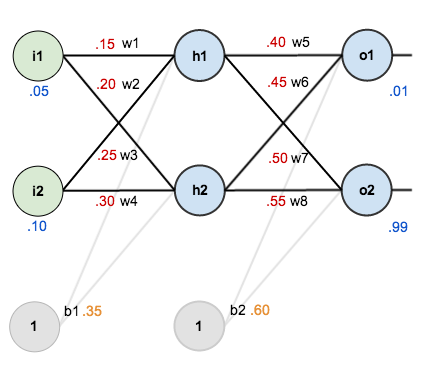

In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                from IPython.display import Image
Image("image.png") 

In [2]:
##############################################################################
# Implementation of a A Step by Step Backpropagation Example by Matt Mazur
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
##############################################################################

# Original code: https://github.com/vendidad/DS-repo/blob/master/Backpropagation%20-%20Consolidated%20Script.ipynb
        
        
import numpy as np
np.set_printoptions(precision=4)

def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(300)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)
    
def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        print(W1,W2)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))

main()

[[0.15 0.2 ]
 [0.25 0.3 ]] [[0.4  0.45]
 [0.5  0.55]]
[[0.1497 0.1997]
 [0.2502 0.3003]] [[0.3589 0.4089]
 [0.5114 0.5614]]
[[0.1494 0.1993]
 [0.2505 0.3005]] [[0.3174 0.3674]
 [0.5225 0.5725]]
[[0.1492 0.1991]
 [0.2507 0.3008]] [[0.2754 0.3254]
 [0.5335 0.5835]]
[[0.149  0.1988]
 [0.2509 0.301 ]] [[0.233  0.283 ]
 [0.5443 0.5943]]
[[0.1488 0.1986]
 [0.2512 0.3013]] [[0.1903 0.2403]
 [0.5548 0.6048]]
[[0.1487 0.1984]
 [0.2514 0.3015]] [[0.1474 0.1974]
 [0.5652 0.6152]]
[[0.1486 0.1983]
 [0.2517 0.3018]] [[0.1042 0.1542]
 [0.5755 0.6255]]
[[0.1486 0.1982]
 [0.2519 0.3021]] [[0.061  0.111 ]
 [0.5855 0.6355]]
[[0.1485 0.1982]
 [0.2521 0.3023]] [[0.0177 0.0677]
 [0.5954 0.6454]]
[[0.1486 0.1981]
 [0.2524 0.3026]] [[-0.0255  0.0245]
 [ 0.6051  0.6551]]
[[0.1486 0.1981]
 [0.2526 0.3028]] [[-0.0687 -0.0187]
 [ 0.6147  0.6647]]
[[0.1487 0.1982]
 [0.2528 0.3031]] [[-0.1116 -0.0616]
 [ 0.6241  0.6741]]
[[0.1489 0.1983]
 [0.2531 0.3033]] [[-0.1543 -0.1043]
 [ 0.6333  0.6833]]
[[0.149  0.1984]
 [0